## 特征抽取

In [25]:
from mmcls.datasets.pipelines import Compose
from mmcv.parallel import collate, scatter

# 载入图像信息字典
data = dict(img_info=dict(filename=img_path), img_prefix=None, img=img_array)

In [27]:
# 构建 test pipeline
cfg = model.cfg
test_pipeline = Compose(cfg.data.test.pipeline)

# 执行前向预测
data = test_pipeline(data)

In [28]:
# Scatter to specified GPU
data = collate([data], samples_per_gpu=1)
data = scatter(data, [device])[0]

In [29]:
with torch.no_grad():
    features = model.extract_feat(data['img'])

# 1280维特征
print(features[0].shape)

torch.Size([1, 1280])


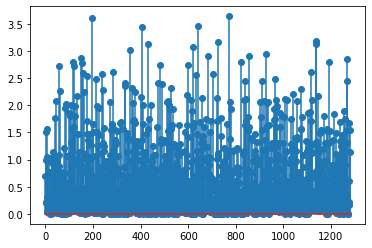

In [30]:
import matplotlib.pyplot as plt
plt.stem(features[0].cpu().numpy().squeeze())
plt.show()